#### Machine Learning
Problem

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factor on which the price of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

● Which variables are significant in predicting the price of a car.

● How well those variables describe the price of a car.

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.

#### Attributes

#### Objective
You are required to model the prices of cars with the available independent variables. It will be used by management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be good for management to understand the pricing dynamics of the new market.

#### Questions -
Step 1 : Understand the Business Problem.

Step 2 : Import all the libraries and set up all the requirements that you will need.

Step 3: Import the data set and check the following

dimension of the dataset.

data types.

Missing value available in the dataset
.
Descriptive statistics of data and write the observation.


Step 4: Data Cleaning

Create the column as 'CompanyName' using 'CarName' Column.

List down the unique 'CompanyName'.

Check the correctness of data in the 'CompanyName' column.

Check the duplicate data in the dataset

#### Step 5: Exploratory Data Analysis
Visualize the 'price' column using displot and boxplot. Write down the observations.

Perform the appropriate transformation to make the target as a gaussian distribution.

Check the linear relationship between the dependent variable "Price" and the numerical independent variables

Checking the multicollinearity between the correlated independent variables above and Price

Perform Univariate, Bivariate, and Multivariate analyses to find the factors that affect the Target variables.

Perform feature engineering based on sound knowledge of the business problem and available dataset.

Step 6: Perform the preprocessing that is required for the model.
    

Step 7: Split the dataset into train and test data sets and perform the scaling on both sets if necessary.

Step 8: Build the base model.

Step 9: Understand how the model is performing, Perform feature engineering again if needed. Do feature selection. Try with various models like parametric and nonparametric models. Once you choose the final model, rebuild the model with the best parameters.

Note: If you are performing with Linear models, check the model is fulfilling the assumptions.

Step 10: Based on your understanding of the model and EDA analysis, Explain the business understanding

# importing libraries

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

from scipy import stats

import pylab
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="darkgrid",font_scale=1.5)
pd.set_option("display.max.columns",None)
pd.set_option("display.max.rows",None)
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor
from sklearn.metrics import r2_score



# Loading datset

In [2]:
df=pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.600000,168.800000,64.100000,48.800000,2548,dohc,four,130,mpfi,3.470000,2.680000,9.000000,111,5000,21,27,13495.000000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.600000,168.800000,64.100000,48.800000,2548,dohc,four,130,mpfi,3.470000,2.680000,9.000000,111,5000,21,27,16500.000000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.500000,171.200000,65.500000,52.400000,2823,ohcv,six,152,mpfi,2.680000,3.470000,9.000000,154,5000,19,26,16500.000000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.800000,176.600000,66.200000,54.300000,2337,ohc,four,109,mpfi,3.190000,3.400000,10.000000,102,5500,24,30,13950.000000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.400000,176.600000,66.400000,54.300000,2824,ohc,five,136,mpfi,3.190000,3.400000,8.000000,115,5500,18,22,17450.000000


In [3]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.100000,188.800000,68.900000,55.500000,2952,ohc,four,141,mpfi,3.780000,3.150000,9.500000,114,5400,23,28,16845.000000
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.100000,188.800000,68.800000,55.500000,3049,ohc,four,141,mpfi,3.780000,3.150000,8.700000,160,5300,19,25,19045.000000
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.100000,188.800000,68.900000,55.500000,3012,ohcv,six,173,mpfi,3.580000,2.870000,8.800000,134,5500,18,23,21485.000000
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.100000,188.800000,68.900000,55.500000,3217,ohc,six,145,idi,3.010000,3.400000,23.000000,106,4800,26,27,22470.000000
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.100000,188.800000,68.900000,55.500000,3062,ohc,four,141,mpfi,3.780000,3.150000,9.500000,114,5400,19,25,22625.000000


# Data preparation

#### 1.checking dimensions of the data

In [4]:
df.shape

(205, 26)

#### obsevation

1.from the above output we can say that there are 205/records and 26 columns/Features present in our dataset.

#### 2.Checking the basic information of dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

#### Observation

1.From above output we can observe that 10 categorical & 16 numerical Attributes.

2.All the features are having correct data-types. So we don't have to do any changes.

#### 3.Descriptive Statistics Analysis.

In [6]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


#### 4.checking null values in our dataset.

In [7]:
df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})

,Total No. of Missing Values
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


#### Observation

1.We can observe that none of the features is having Missing values.

#### 5.Checking duplicate values.

In [8]:
print('Duplicate values =',df.duplicated().sum())

Duplicate values = 0


#### Observation

1.From the above output we can say that there is no duplicate records present in our dataset.

#### 6.showing only categorical features.

In [9]:
df.select_dtypes(include="object").head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


#### 7. Showing only the Numerical Features.

In [10]:
df.select_dtypes(include=["int64","float64"]).head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.600000,168.800000,64.100000,48.800000,2548,130,3.470000,2.680000,9.000000,111,5000,21,27,13495.000000
1,2,3,88.600000,168.800000,64.100000,48.800000,2548,130,3.470000,2.680000,9.000000,111,5000,21,27,16500.000000
2,3,1,94.500000,171.200000,65.500000,52.400000,2823,152,2.680000,3.470000,9.000000,154,5000,19,26,16500.000000
3,4,2,99.800000,176.600000,66.200000,54.300000,2337,109,3.190000,3.400000,10.000000,102,5500,24,30,13950.000000
4,5,2,99.400000,176.600000,66.400000,54.300000,2824,136,3.190000,3.400000,8.000000,115,5500,18,22,17450.000000


# Data cleaning

#### 1.Create the column as 'CompanyName' using 'CarName' Column.

In [11]:
company_name=df['CarName'].apply(lambda x: x.split(" ")[0])
df.insert(2,'CompanyName',company_name)

# now we can drop the CarName feature.
df.drop(columns=['CarName'],inplace=True)

In [12]:
df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.600000,168.800000,64.100000,48.800000,2548,dohc,four,130,mpfi,3.470000,2.680000,9.000000,111,5000,21,27,13495.000000
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.600000,168.800000,64.100000,48.800000,2548,dohc,four,130,mpfi,3.470000,2.680000,9.000000,111,5000,21,27,16500.000000
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.500000,171.200000,65.500000,52.400000,2823,ohcv,six,152,mpfi,2.680000,3.470000,9.000000,154,5000,19,26,16500.000000
3,4,2,audi,gas,std,four,sedan,fwd,front,99.800000,176.600000,66.200000,54.300000,2337,ohc,four,109,mpfi,3.190000,3.400000,10.000000,102,5500,24,30,13950.000000
4,5,2,audi,gas,std,four,sedan,4wd,front,99.400000,176.600000,66.400000,54.300000,2824,ohc,five,136,mpfi,3.190000,3.400000,8.000000,115,5500,18,22,17450.000000


#### 2.checking the unique car company names.

In [13]:
df['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

#### obseravtion

1.There seems to be some spelling error in the CompanyName column.

      :maxda = mazda
      :Nissan = nissan
      :porsche = porcshce
      :toyota = toyouta
      :vokswagen = volkswagen = vw

2.So we have to replace those incorrect car company names wit correct company's name.

#### 3.Creating a function to replace the value.

In [14]:
def replace(a,b):
    df['CompanyName'].replace(a,b,inplace=True)
    
replace('maxda','mazda')
replace('nissan','Nissan')
replace('porcshce','porsche')
replace('toyouta','toyota')
replace('vokswagen','volkswagen')
replace('vw','volkswagen')

In [15]:
df['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

#### Observation

1.Now all the car company name seems correct.So we don't need to do any more cleaning.

2.Now we can go to next step which is exploratory data analysis.

# Exploratory Data Analysis(EDA)

#### 1.Visualizing our Target Feature

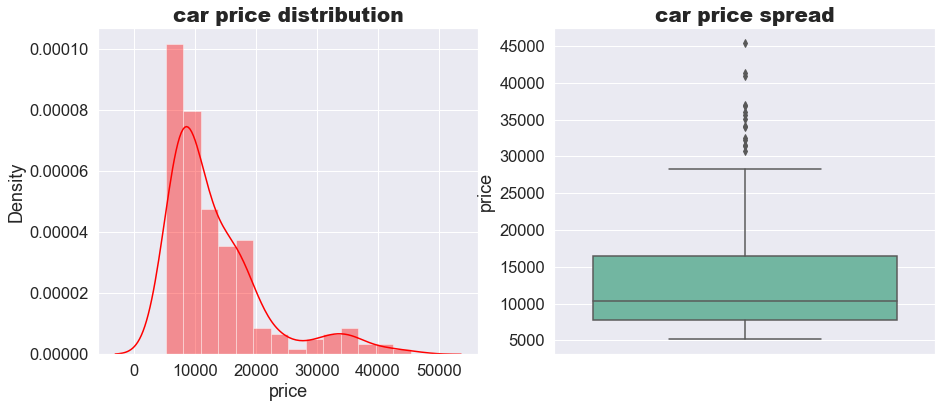

In [16]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(df['price'],color='red',kde=True)
plt.title("car price distribution",fontweight='black',fontsize=20)

plt.subplot(1,2,2)
sns.boxplot(y=df['price'],palette='Set2')
plt.title("car price spread",fontweight='black',fontsize=20)
plt.show()

In [17]:
df['price'].agg(['min','mean','median','max','std','skew']).to_frame().T

,min,mean,median,max,std,skew
price,5118.000000,13276.710571,10295.000000,45400.000000,7988.852332,1.777678


#### obseravtion

1.we can clearly observe that our price feature is right skewed.

2.we can clearly onserve that there is a significant difference between mean & median.

3.we can also make an isgight that most of the car's price is below 14000.

4.we can also say that the skewness of the car price is above 1.5 which means that the data points are highly spread.


#### appropriate transformation to make the target as a gaussian distribution

In [18]:
df1=pd.DataFrame(df['price'])

<AxesSubplot:xlabel='boxcox_price', ylabel='Density'>

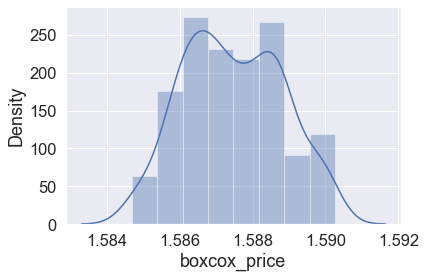

In [19]:
df1['boxcox_price'],parameters=stats.boxcox(df['price'])
sns.distplot(df1['boxcox_price'])

<AxesSubplot:xlabel='log_price', ylabel='Density'>

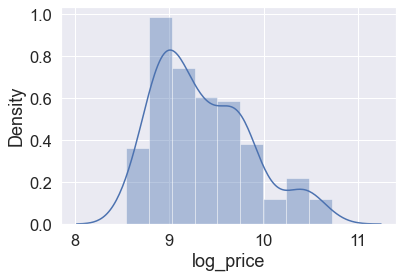

In [20]:
df1['log_price']=np.log(df['price'])
sns.distplot(df1['log_price'])

<AxesSubplot:xlabel='sqrt_price', ylabel='Density'>

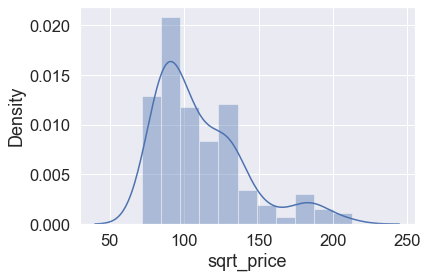

In [21]:
df1['sqrt_price']=np.sqrt(df['price'])
sns.distplot(df1['sqrt_price'])

#### obseravtion

1.we can see clearly observe that our car price column get most noramalised in
  boxcox transforamtion so we will go with boxcox transformation

#### 2.visualizing total number of cars sold by different company.

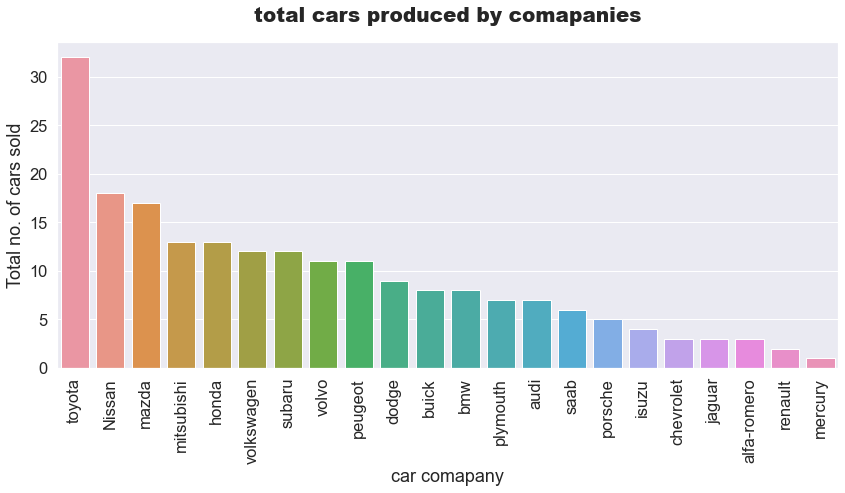

In [22]:
plt.figure(figsize=(14,6))
counts=df['CompanyName'].value_counts()
sns.barplot(x=counts.index,y=counts.values)
plt.xlabel("car comapany")
plt.ylabel("Total no. of cars sold")
plt.title("total cars produced by comapanies",pad=20,fontweight="black",fontsize=20)
plt.xticks(rotation=90)
plt.show()

#### obseravtion

1.toyota company has sold the highest numbers of cars.

2.renault,mercury are having low data-points so we can say that they are least sold car companies.


#### 3.visualizing 'carcompany' w.r.t 'price'

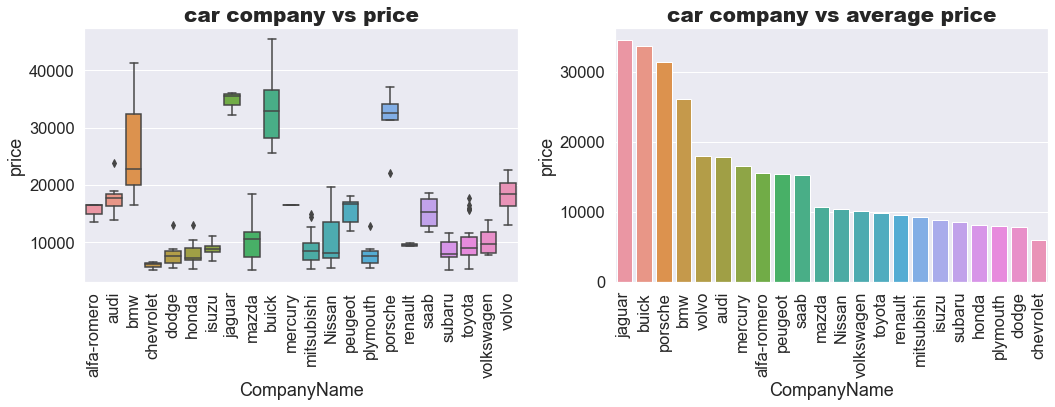

In [23]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(x='CompanyName',y='price',data=df)
plt.xticks(rotation=90)
plt.title("car company vs price",fontweight="black",fontsize=20)

plt.subplot(1,2,2)
x=pd.DataFrame(df.groupby('CompanyName')['price'].mean().sort_values(ascending=False))
sns.barplot(x=x.index,y='price',data=x)
plt.xticks(rotation=90)
plt.title("car company vs average price",fontweight="black",fontsize=20)
plt.tight_layout()
plt.show()

#### insights

1.Jaguar & buick seems to have the highest price range cars.

2.Car companies like Renault & Mercury are having only one to two datapoints.

3.So we can't make any inference related to lowest price range car companies.

4.Since there are too many categories in car compnay feature. So we can derive a new feature Company Price Range which will show the price range
as Low Range, Medium Range, High Range.

#### 4. Visualizing 'Car Fuel' & 'price'

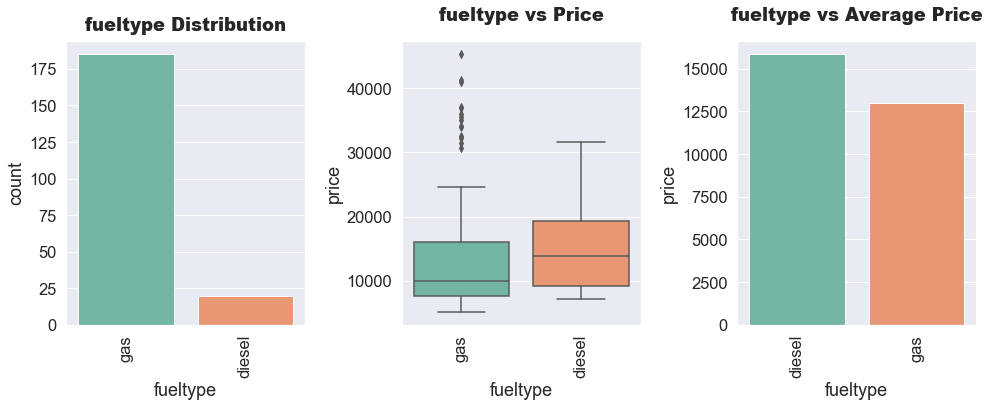

In [24]:
def categorical_visualization(cols):
    plt.figure(figsize=(14,6))
    plt.subplot(1,3,1)
    sns.countplot(x=cols,data=df,palette="Set2",order=df[cols].value_counts().index)
    plt.title(f"{cols} Distribution",pad=10,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)

    plt.subplot(1,3,2)
    sns.boxplot(x=cols,y="price",data=df,palette="Set2")
    plt.title(f"{cols} vs Price",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)
    
    plt.subplot(1,3,3)
    x=pd.DataFrame(df.groupby(cols)["price"].mean().sort_values(ascending=False))
    sns.barplot(x=x.index,y="price",data=x,palette="Set2")
    plt.title(f"{cols} vs Average Price",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

categorical_visualization("fueltype")

#### insights

1.We can clearly make an insight that Cars having gas fuel system is mostly sold.

2.From the second plot we can make an insight that Gas Fuel Sysytem cars are availabe within every price range.

3.Both type of fuel cars are having most of the cars price near to average price of the cars. But the gas Fuel Type cars are having cars with high prices also.

4.From the third plot we can make an inisght that the Average price of gas fuel type cars are less than diesel fuel type cars.

5.So we can say that customers prefer those cars which consumes less price in fuels.

#### 5. Visualizing 'Aspiration' & 'price'

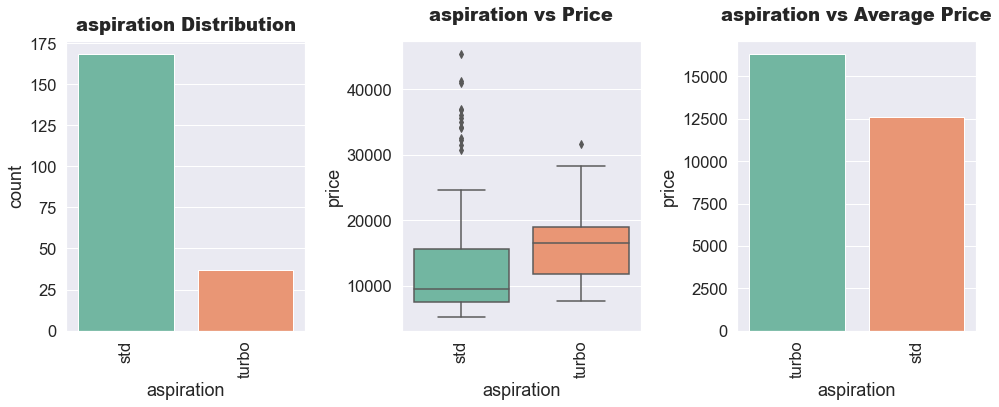

In [25]:
categorical_visualization("aspiration")

#### insights

1.Cars having STD Aspiration are highly sold when compared with Turbo Aspiration.

2.Cars having Turbo Aspiration have higher price range than the STD Aspiration.

3.Outliers present in STD Aspiration states that some of the cars having std aspiration are expensive too.

#### 6. Visualizing 'Door number' & 'price'

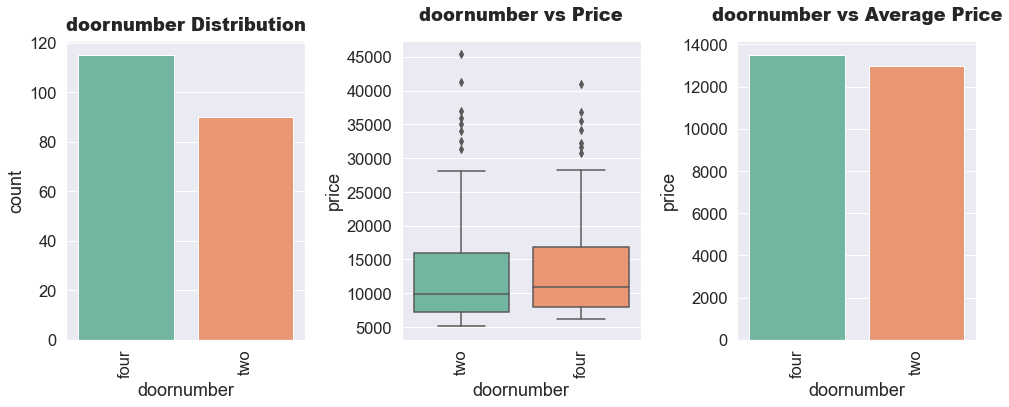

In [26]:
categorical_visualization("doornumber")

#### insights

1.Cars having Four Doors are mostly sold when compared with cars having Two Doors.

2.Cars having Fours Doors are little more expensive when we compare the average price of cars having two doors or four doors.

3.Cars having Four Doors are mostly sold. But there's not a big difference between the sales of cars having four doors & two doors..

4.Outliers prsesent in two doors cars states that some of the cars are more expensive than the cars having four doors

5.Door numbers category is not affecting the price that much.


#### 7. Visualizing 'car body' & 'price'

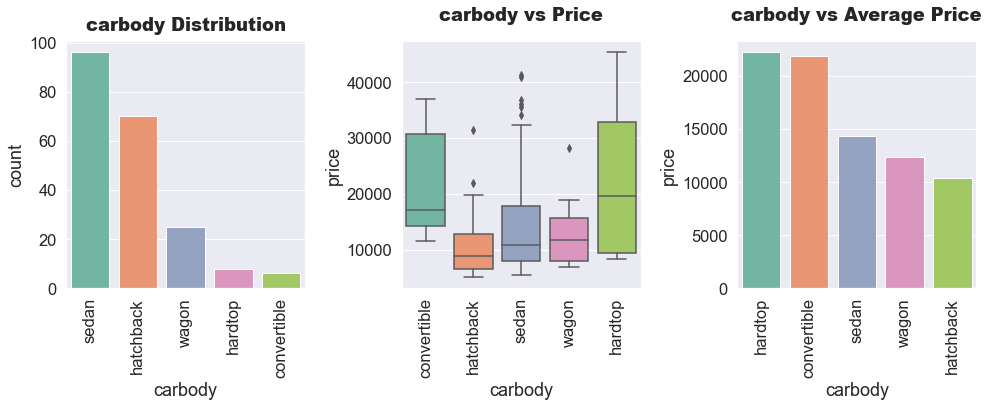

In [27]:
categorical_visualization("carbody")

#### insights

1.Cars having sedan body-type are mostly sold followed by hatchback.

2.Cars having convertible or hardtop body-type are less sold.

3.Cars having Hardtop body-type is the mostly expensive cars followed by convertible.

4.Convertible & Hardtop body-types are less sold because they are very expensive cars. So most of the customers couldn't prefer it.

5.Cars having Sedan body-type is the third most expensive car. But still its having the most number of car sales. So we can say customers prefer medium price range cars.

#### 8. Visualizing 'Drive wheel' & 'price'

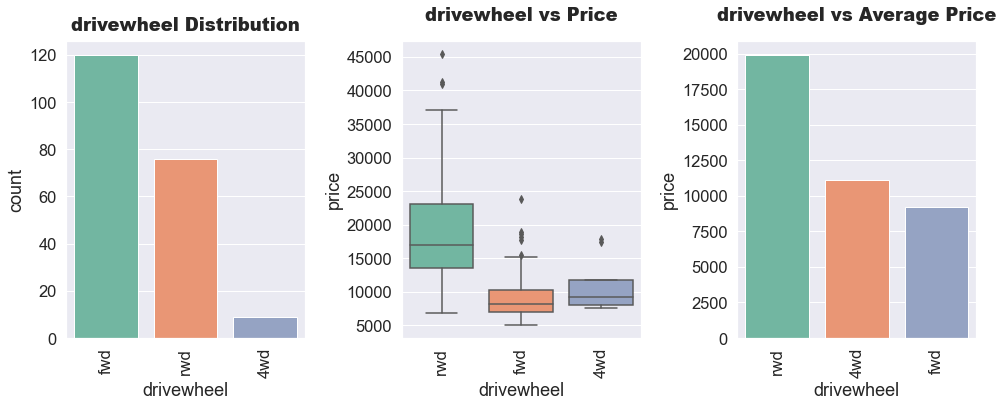

In [28]:
categorical_visualization("drivewheel")

#### insights

1.Most of the cars which are sold are having Front Wheel Drive (FWD) followed by Rear Wheel Drive (RWD).

2.Cars having Rear Wheel Drive are mostly expensive cars. But cars having Front Wheel Drive are the cheapest.

3.We can make an insight that the high rated cars must be using Rear Wheel Drive.

4.Cars with low prices must be using Forward Wheel Drive


#### 9. Visualizing 'Engine location' & 'price'

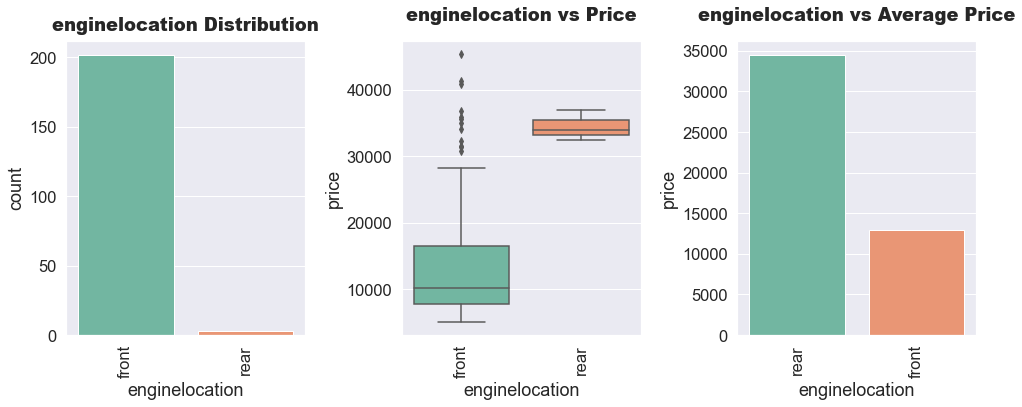

In [29]:
categorical_visualization("enginelocation")

In [30]:
df[df["enginelocation"]=="rear"]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
126,127,3,porsche,gas,std,two,hardtop,rwd,rear,89.500000,168.900000,65.000000,51.600000,2756,ohcf,six,194,mpfi,3.740000,2.900000,9.500000,207,5900,17,25,32528.000000
127,128,3,porsche,gas,std,two,hardtop,rwd,rear,89.500000,168.900000,65.000000,51.600000,2756,ohcf,six,194,mpfi,3.740000,2.900000,9.500000,207,5900,17,25,34028.000000
128,129,3,porsche,gas,std,two,convertible,rwd,rear,89.500000,168.900000,65.000000,51.600000,2800,ohcf,six,194,mpfi,3.740000,2.900000,9.500000,207,5900,17,25,37028.000000


#### insights

1.Most of the cars are having engine location in front.

2.Note there are only 3 data-points for the rear category.

3.So we can't make any inference of car price when compared with engine location.

4.If we want we can drop this feature before training as it may lead to overfitting.

#### 10. Visualizing 'Engine type' & 'price'

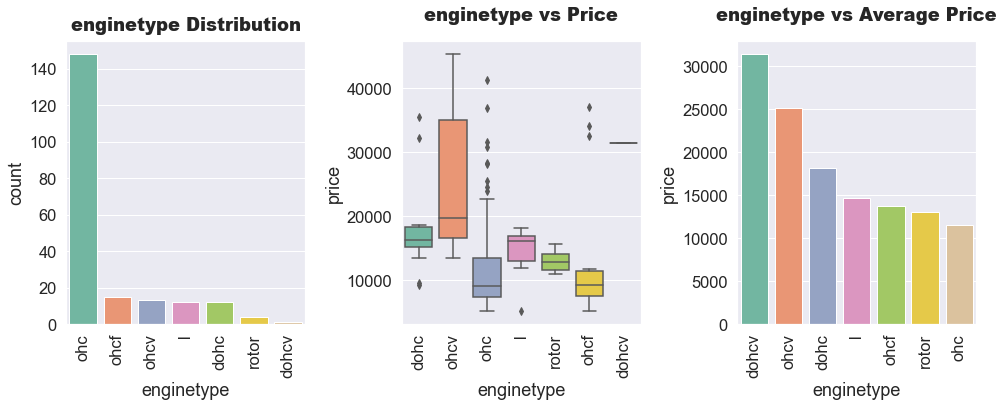

In [31]:
categorical_visualization("enginetype")

In [32]:
df[df["enginetype"]=="dohcv"]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
129,130,1,porsche,gas,std,two,hatchback,rwd,front,98.400000,175.700000,72.300000,50.500000,3366,dohcv,eight,203,mpfi,3.940000,3.110000,10.000000,288,5750,17,28,31400.500000


In [33]:
df[df["enginetype"]=="rotor"]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
55,56,3,mazda,gas,std,two,hatchback,rwd,front,95.300000,169.000000,65.700000,49.600000,2380,rotor,two,70,4bbl,3.330000,3.255000,9.400000,101,6000,17,23,10945.000000
56,57,3,mazda,gas,std,two,hatchback,rwd,front,95.300000,169.000000,65.700000,49.600000,2380,rotor,two,70,4bbl,3.330000,3.255000,9.400000,101,6000,17,23,11845.000000
57,58,3,mazda,gas,std,two,hatchback,rwd,front,95.300000,169.000000,65.700000,49.600000,2385,rotor,two,70,4bbl,3.330000,3.255000,9.400000,101,6000,17,23,13645.000000
58,59,3,mazda,gas,std,two,hatchback,rwd,front,95.300000,169.000000,65.700000,49.600000,2500,rotor,two,80,mpfi,3.330000,3.255000,9.400000,135,6000,16,23,15645.000000


#### Insights

1.Cars having Overhead Camshaft (OHC) engines are mostly sold.

2.Only one car has been sold having engine type dohcv.

3.There are very few data-points of engine type dohcv & rotor. So we can say that cars having ohcv engine types are mostly expensive.

4.Cars hvaing Overhead Camshaft (OHC) engines are least expensive cars.

#### 11. Visualizing 'cylinder number' & 'price'

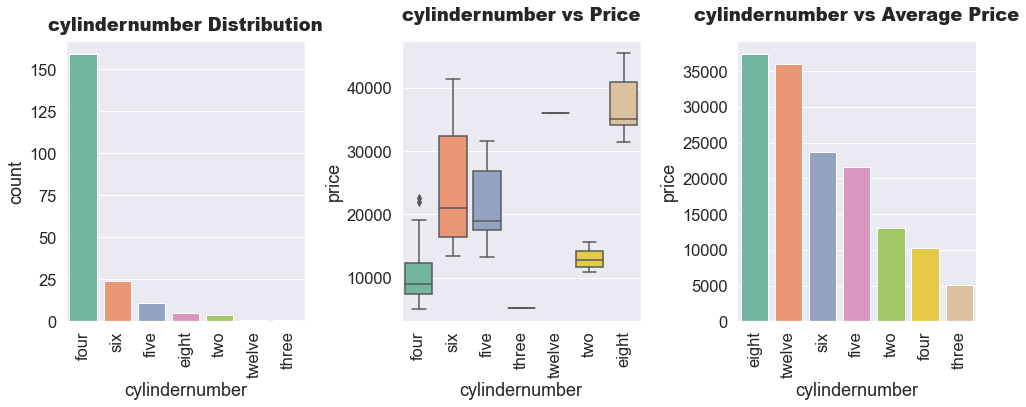

In [34]:
categorical_visualization("cylindernumber")

In [35]:
df[df["cylindernumber"]=="three"]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
18,19,2,chevrolet,gas,std,two,hatchback,fwd,front,88.400000,141.100000,60.300000,53.200000,1488,l,three,61,2bbl,2.910000,3.030000,9.500000,48,5100,47,53,5151.000000


In [36]:
df[df["cylindernumber"]=="twelve"]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
49,50,0,jaguar,gas,std,two,sedan,rwd,front,102.000000,191.700000,70.600000,47.800000,3950,ohcv,twelve,326,mpfi,3.540000,2.760000,11.500000,262,5000,13,17,36000.000000


#### Insights

1.Most of the cars are having Four cyclinders followed by cars having six cyclinders.

2.There are only one data-point each for car having Three & Twelve data-points.

3.Cars having eight cyclinders are most expensive cars followed by six cyclinders.

##### 12. Visualizing 'fuel system' & 'price'

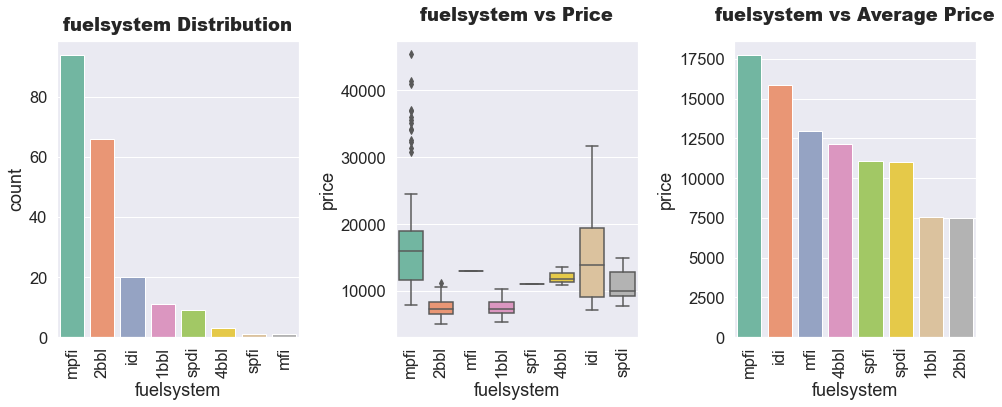

In [37]:
categorical_visualization("fuelsystem")

In [38]:
df[df["fuelsystem"]=="mfi"]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
29,30,3,dodge,gas,turbo,two,hatchback,fwd,front,95.900000,173.200000,66.300000,50.200000,2811,ohc,four,156,mfi,3.600000,3.900000,7.000000,145,5000,19,24,12964.000000


In [39]:
df[df["fuelsystem"]=="spfi"]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
46,47,2,isuzu,gas,std,two,hatchback,rwd,front,96.000000,172.600000,65.200000,51.400000,2734,ohc,four,119,spfi,3.430000,3.230000,9.200000,90,5000,24,29,11048.000000


#### Insight

1.Most of the cars are having mpfi & 2bbl fuelsystems.

2.Cars having mpfi fuel system are the expensive cars followed by idi fuel system cars.

3.There are only one data-point for each mfi and spfi fuelsystem cars. So we can make any further inference.

#### 13. Visualizing 'Symboling' & 'price'

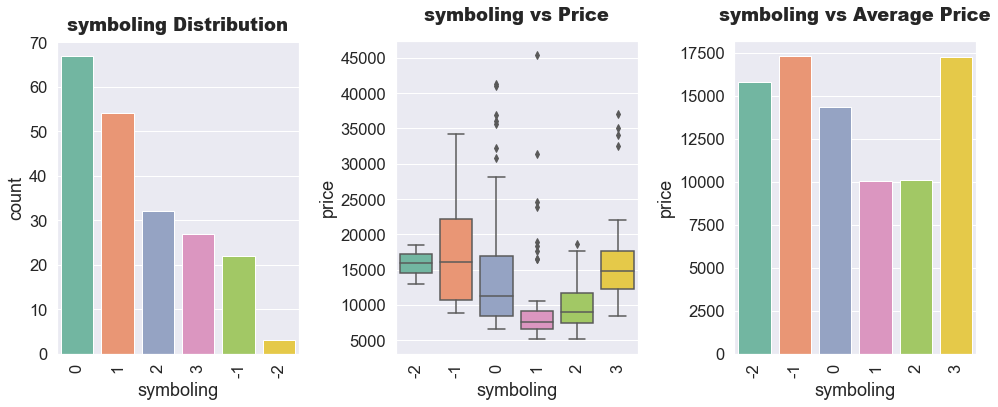

In [40]:
categorical_visualization("symboling")

#### Insights

1.We can clearly observe cars having symboling 0 or 1 are motly preferred.

2.We can aslo observe that symboling -2,-1, 0, 3 are expensive.

#### 14. Visualizing "CarLength", "CarWidth","Carheight" Features w.r.t "Price".

In [41]:
def scatter_plot(cols):
    x=1
    plt.figure(figsize=(15,6))
    for col in cols:
        plt.subplot(1,3,x)
        sns.scatterplot(x=col,y="price",data=df,color="blue")
        plt.title(f"{col} vs Price",fontweight="black",fontsize=20)
        plt.tight_layout()
        x+=1

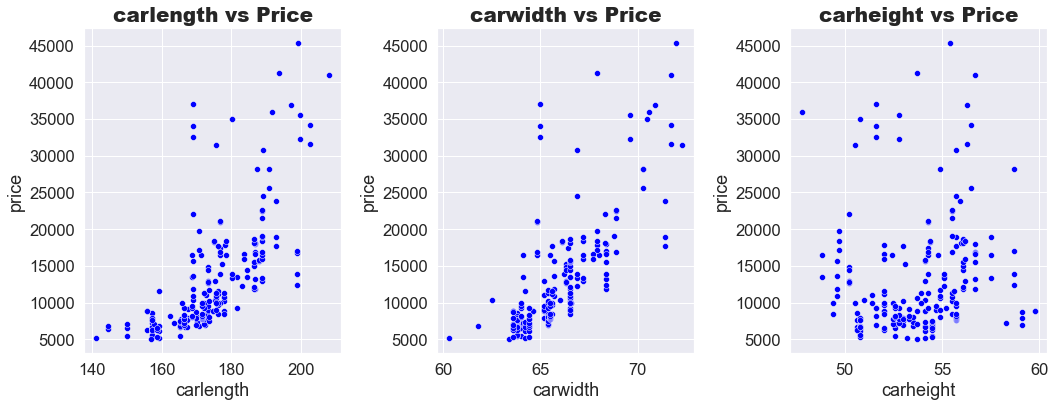

In [42]:
scatter_plot(["carlength","carwidth","carheight"])

#### Insights

1.We can clearly observe that carlength & carwidth features are highly correlated with the price feature.

2.So we can make an insight that with increment in length & width of the car there is an increment in price too.

3.From carlength vs price we can't make any inference as the data-points are too scattered.

4.Since CarHeight is not affecting Price We can drop this feature.

#### 15. Visualizing "EngineSize","Boreratio" & "Stroke" Feature

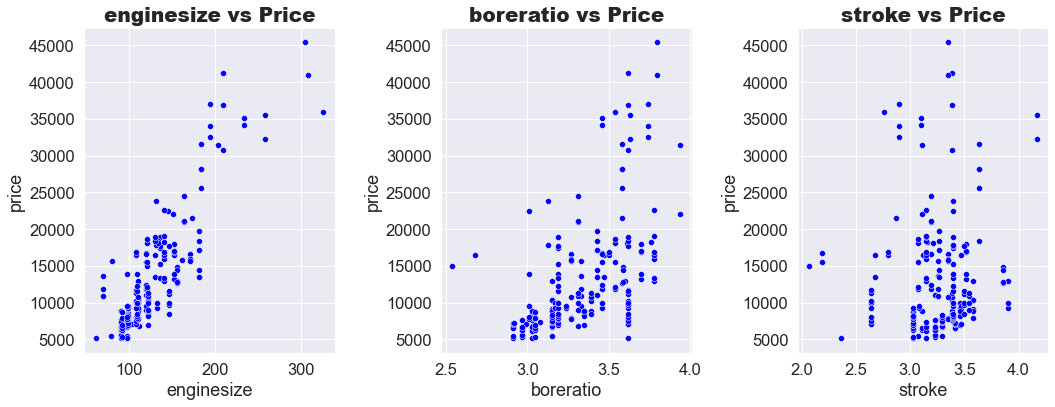

In [43]:
scatter_plot(["enginesize","boreratio","stroke"])

#### Insights

1.We can clearly observe that Enginesize is highly correlated with price feature. So we can say with the increment in enginesize the price of the cars increases.

2.From Boreratio vs Price we can observe that the feature is not highly correlated but still there's a correlation between the features. So we can say with increment in boreratio the price of cars increases.

3.From Stroke vs Price we can't make any inference as the data-points are too scattered.

4.Since Stroke is not affecting Price that much. We can drop this feature.

#### 16. Visualizing "Compreessionratio","Horesepower" & "Peakrpm" Features.

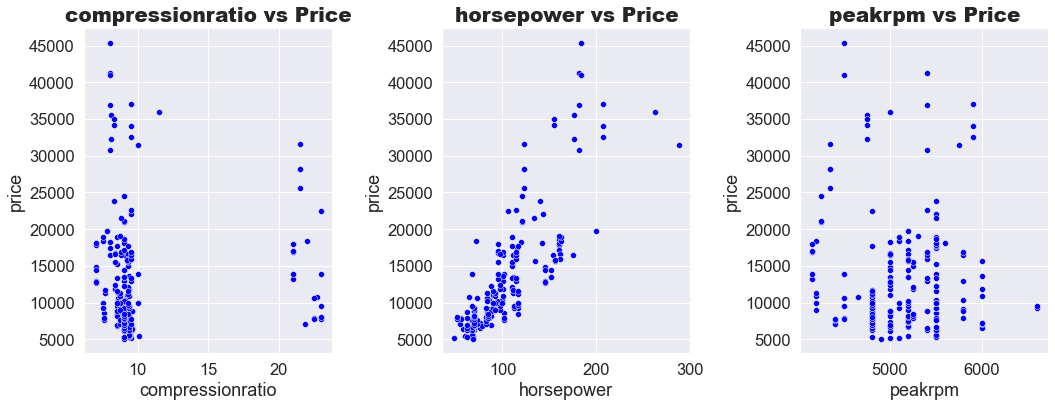

In [44]:
scatter_plot(["compressionratio","horsepower","peakrpm"])

#### Insights

1.We can clearly observe that Horsepower is highly correlated with Price. So we can say with the increment in Horsepower the price of cars also increases.

2.From Compressionratio vs Price & Peakrpm vs Price visuals we can't make any inference as the data-points are too scattered.

3.SInce Compressionratio & Peakrpm is not affecting price. So we can drop this features.

#### 17. Visualizing "WheelBase" & "Curbweight" Features.

In [45]:
def scatter_plot(cols):
    x=1
    plt.figure(figsize=(15,6))
    for col in cols:
        plt.subplot(1,2,x)
        sns.scatterplot(x=col,y="price",data=df,color="blue")
        plt.title(f"{col} vs Price",fontweight="black",fontsize=20,pad=10)
        plt.tight_layout()
        x+=1

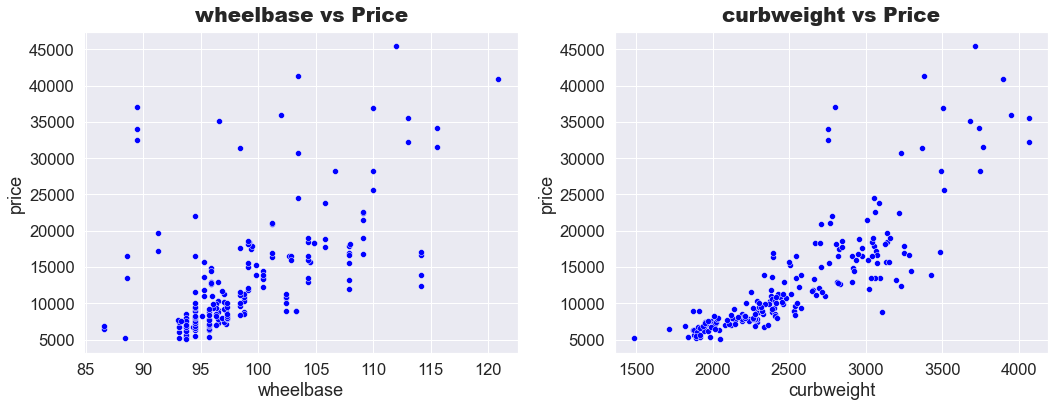

In [46]:
scatter_plot(["wheelbase","curbweight"])

#### Insights

1.We can clearly observe that Curbweight is highly correlated with Price. So we can say with the increase in curbweight the price of cars increases.

2.From wheelbase vs price we can say that they are not highly correlated but still there's a correlation. So with wheel base the price of the cars also increases.

#### 18. Visualizing "Citympg" & "Highwaympg" Features.

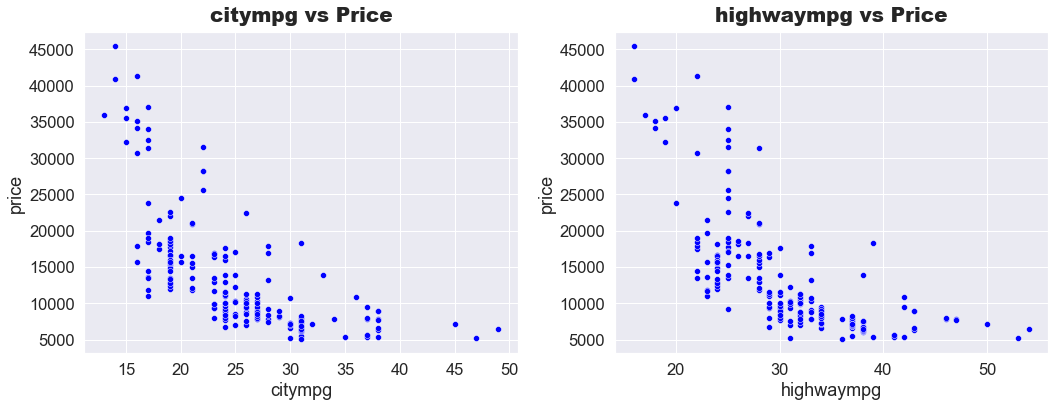

In [47]:
scatter_plot(["citympg","highwaympg"])

#### Insights

1.We can clearly observe that Citympg & Highwaympg are having negative correlation with the price.

2.So we can say that with the increment in citympg & Highwaympg the price of the cars decreases.

3.So our both Citympg & Highwaympg are useful features for price prediction.

#### 19. List of all the useful Features.

#### List of all the useful Categorical Features.

1.CompanyName

2.Fuel Type

3.Aspiration

4.Door Number

5.Car Body

6.Drive Wheel

7.Engine Type

8.Cyclinder Number

9.Fuel System


#### List of all he useful Numerical Features.

1.Wheelbase

2.Carlength

3.Carwidth

4.Curbeweight

5.Enginesize

6.Boreratio

7.Horsepower

8.citympg

9.Highwaympg

10.Price

# Fetaure Engineering

#### 1. Deriving New Features From "Company Name" Feature.

As we made an insight above that we can split the car company name into different price ranges.Like Low Range, Medium Range, High Range cars.

In [48]:
z = round(df.groupby(["CompanyName"])["price"].agg(["mean"]),2).T
z

CompanyName,Nissan,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
mean,10415.670000,15498.330000,17859.170000,26118.750000,33647.000000,6007.000000,7875.440000,8184.690000,8916.500000,34600.000000,10652.880000,16503.000000,9239.770000,15489.090000,7963.430000,31400.500000,9595.000000,15223.330000,8541.250000,9885.810000,10077.500000,18063.180000


#### Note

1.In above output we fetched the avergae price of each individual car companies

2.Now we have to add this average values a new column in our datset.

In [49]:
df = df.merge(z.T,how="left",on="CompanyName")

In [50]:
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
df['CarsRange'] = pd.cut(df['mean'],bins,right=False,labels=cars_bin)
df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,mean,CarsRange
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.600000,168.800000,64.100000,48.800000,2548,dohc,four,130,mpfi,3.470000,2.680000,9.000000,111,5000,21,27,13495.000000,15498.330000,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.600000,168.800000,64.100000,48.800000,2548,dohc,four,130,mpfi,3.470000,2.680000,9.000000,111,5000,21,27,16500.000000,15498.330000,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.500000,171.200000,65.500000,52.400000,2823,ohcv,six,152,mpfi,2.680000,3.470000,9.000000,154,5000,19,26,16500.000000,15498.330000,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.800000,176.600000,66.200000,54.300000,2337,ohc,four,109,mpfi,3.190000,3.400000,10.000000,102,5500,24,30,13950.000000,17859.170000,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.400000,176.600000,66.400000,54.300000,2824,ohc,five,136,mpfi,3.190000,3.400000,8.000000,115,5500,18,22,17450.000000,17859.170000,Medium


# Data Preprocessing

#### 1. Creating new DataFrame with all the useful Features.

In [51]:
new_df = df[['fueltype','aspiration','doornumber','carbody','drivewheel','enginetype','cylindernumber','fuelsystem'
             ,'wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg',
             'price','CarsRange']]

In [52]:
new_df.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginetype,cylindernumber,fuelsystem,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,CarsRange
0,gas,std,two,convertible,rwd,dohc,four,mpfi,88.600000,168.800000,64.100000,2548,130,3.470000,111,21,27,13495.000000,Medium
1,gas,std,two,convertible,rwd,dohc,four,mpfi,88.600000,168.800000,64.100000,2548,130,3.470000,111,21,27,16500.000000,Medium
2,gas,std,two,hatchback,rwd,ohcv,six,mpfi,94.500000,171.200000,65.500000,2823,152,2.680000,154,19,26,16500.000000,Medium
3,gas,std,four,sedan,fwd,ohc,four,mpfi,99.800000,176.600000,66.200000,2337,109,3.190000,102,24,30,13950.000000,Medium
4,gas,std,four,sedan,4wd,ohc,five,mpfi,99.400000,176.600000,66.400000,2824,136,3.190000,115,18,22,17450.000000,Medium


#### 2. Creating Dummies Variables for all the Categorical Features.

In [53]:
new_df = pd.get_dummies(columns=["fueltype","aspiration","doornumber","carbody","drivewheel","enginetype",
                                "cylindernumber","fuelsystem","CarsRange"],data=new_df)

In [54]:
new_df.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarsRange_Budget,CarsRange_Medium,CarsRange_Highend
0,88.600000,168.800000,64.100000,2548,130,3.470000,111,21,27,13495.000000,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,88.600000,168.800000,64.100000,2548,130,3.470000,111,21,27,16500.000000,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,94.500000,171.200000,65.500000,2823,152,2.680000,154,19,26,16500.000000,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,99.800000,176.600000,66.200000,2337,109,3.190000,102,24,30,13950.000000,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,99.400000,176.600000,66.400000,2824,136,3.190000,115,18,22,17450.000000,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


#### 3. Feature Scaling of Numerical Data.

In [55]:
scaler = StandardScaler()

In [56]:
num_cols = ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower',
            'citympg','highwaympg']

new_df[num_cols] = scaler.fit_transform(new_df[num_cols])

In [57]:
new_df.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarsRange_Budget,CarsRange_Medium,CarsRange_Highend
0,-1.690772,-0.426521,-0.844782,-0.014566,0.074449,0.519071,0.174483,-0.646553,-0.546059,13495.000000,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,-1.690772,-0.426521,-0.844782,-0.014566,0.074449,0.519071,0.174483,-0.646553,-0.546059,16500.000000,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,-0.708596,-0.231513,-0.190566,0.514882,0.604046,-2.404880,1.264536,-0.953012,-0.691627,16500.000000,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0.173698,0.207256,0.136542,-0.420797,-0.431076,-0.517266,-0.053668,-0.186865,-0.109354,13950.000000,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.107110,0.207256,0.230001,0.516807,0.218885,-0.517266,0.275883,-1.106241,-1.273900,17450.000000,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


#### 4. Selecting Features & Labels for Model Training & Testing

In [58]:
x = new_df.drop(columns=["price"])
y = new_df["price"]

In [59]:
x.shape

(205, 48)

In [60]:
y.shape

(205,)

#### 5. Splitting Data for Model Traning & Testing.

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [62]:
print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (164, 48)
x_test:  (41, 48)
y_train:  (164,)
y_test:  (41,)


# Model Building

In [63]:
#x = sm.add_constant(x)
mlr_model=sm.OLS(y_train,x_train).fit()

mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     85.41
Date:                Sat, 06 May 2023   Prob (F-statistic):           5.79e-73
Time:                        16:23:35   Log-Likelihood:                -1436.2
No. Observations:                 164   AIC:                             2946.
Df Residuals:                     127   BIC:                             3061.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
wheelbase               438.1948    451.788      0.970      0.334    -455.813    1332.203
carlength              -735.5300    551.479     -1.334      0.185   -1826.808     355.748
carwidth               1018.9586    429.782      2.371      0.019     168.497    1869.420
curbweight             2619.2302    813.549      3.220      0.002    1009.363    4229.098
enginesize              978.3792    778.474      1.257      0.211    -562.080    2518.839
boreratio             -1088.2673    358.495     -3.036      0.003   -1797.664    -378.871
horsepower             3217.6793    600.613      5.357      0.000    2029.175    4406.183
citympg                -470.1555    835.315     -0.563      0.575   -2123.093    1182.782
highwaympg              693.5922    798.828      0.868      0.387    -887.144    2274.328
fueltype_diesel        2167.4929    349.443      6.203      0.000    1476.009    2858.977
fueltype_gas           2574.8247    485.365      5.305      0.000    1614.375    3535.275
aspiration_std         2276.4275    327.959      6.941      0.000    1627.457    2925.398
aspiration_turbo       2465.8901    465.375      5.299      0.000    1544.997    3386.783
doornumber_four        2646.5317    337.945      7.831      0.000    1977.799    3315.264
doornumber_two         2095.7859    316.833      6.615      0.000    1468.830    2722.742
carbody_convertible    3603.0255    824.975      4.367      0.000    1970.550    5235.501
carbody_hardtop        1899.0015    905.326      2.098      0.038     107.524    3690.479
carbody_hatchback      -168.7593    416.813     -0.405      0.686    -993.557     656.038
carbody_sedan           108.8970    392.099      0.278      0.782    -666.997     884.791
carbody_wagon          -699.8472    573.798     -1.220      0.225   -1835.290     435.596
drivewheel_4wd         1035.1215    781.990      1.324      0.188    -512.295    2582.538
drivewheel_fwd         1560.5569    431.861      3.614      0.000     705.982    2415.132
drivewheel_rwd         2146.6393    483.434      4.440      0.000    1190.011    3103.268
enginetype_dohc        2618.8742    887.099      2.952      0.004     863.466    4374.283
enginetype_dohcv      -1.242e+04   2917.337     -4.257      0.000   -1.82e+04   -6646.157
enginetype_l           2061.2143   1161.963      1.774      0.078    -238.101    4360.530
enginetype_ohc         3765.3910    859.350      4.382      0.000    2064.893    5465.889
enginetype_ohcf        6479.0499    990.343      6.542      0.000    4519.341    8438.759
enginetype_ohcv        -500.8518    927.540     -0.540      0.590   -2336.286    1334.582
enginetype_rotor       2737.6813   1035.824      2.643      0.009     687.973    4787.390
cylindernumber_eight   6161.9087   1592.870      3.868      0.000    3009.906    9313.911
cylindernumber_five    

In [64]:
training_score = []
testing_score = []

In [65]:
def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    a = r2_score(y_train,x_train_pred)*100
    b = r2_score(y_test,x_test_pred)*100
    training_score.append(a)
    testing_score.append(b)

    
    print(f"r2_Score of {model} model on Training Data is:",a)
    print(f"r2_Score of {model} model on Testing Data is:",b)
    

#### 1. Linear-Regression Model

In [66]:
model_prediction(LinearRegression())

r2_Score of LinearRegression() model on Training Data is: 96.03347906215075
r2_Score of LinearRegression() model on Testing Data is: 88.26307199077354


#### 2. Decision-Tree-Regressor Model

In [67]:
model_prediction(DecisionTreeRegressor())

r2_Score of DecisionTreeRegressor() model on Training Data is: 99.86537119069865
r2_Score of DecisionTreeRegressor() model on Testing Data is: 90.70917484835508


#### 3. Random-Forest-Regressor Model

In [68]:
model_prediction(RandomForestRegressor())

r2_Score of RandomForestRegressor() model on Training Data is: 98.83194048637915
r2_Score of RandomForestRegressor() model on Testing Data is: 95.2551283618968


#### 4. Ada-Boost-Regressor Model

In [69]:
model_prediction(AdaBoostRegressor())

r2_Score of AdaBoostRegressor() model on Training Data is: 95.9442830370879
r2_Score of AdaBoostRegressor() model on Testing Data is: 92.02495649461027


#### 5. Gradient-Boosting-Regressor Model

In [70]:
model_prediction(GradientBoostingRegressor())

r2_Score of GradientBoostingRegressor() model on Training Data is: 99.33147476783101
r2_Score of GradientBoostingRegressor() model on Testing Data is: 92.26313982415957


#### All Model Performance Comparison

In [71]:
models = ["Linear Regression","Decision Tree","Random Forest","Ada Boost","Gradient Boost"]

In [72]:
df = pd.DataFrame({"Algorithms":models,
                   "Training Score":training_score,
                   "Testing Score":testing_score})

In [73]:
df

,Algorithms,Training Score,Testing Score
0,Linear Regression,96.033479,88.263072
1,Decision Tree,99.865371,90.709175
2,Random Forest,98.831940,95.255128
3,Ada Boost,95.944283,92.024956
4,Gradient Boost,99.331475,92.263140


#### Plotting above results using column-bar chart

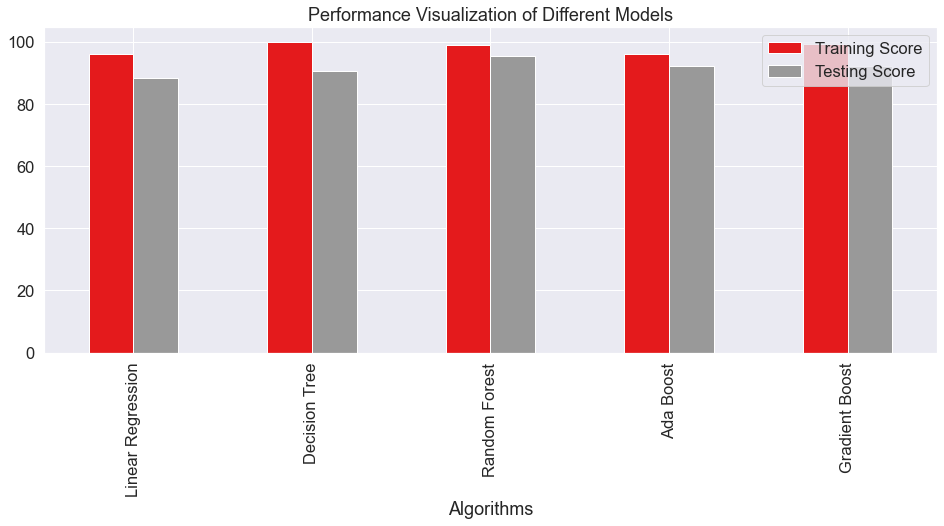

In [74]:
df.plot(x="Algorithms",y=["Training Score","Testing Score"], figsize=(16,6),kind="bar",
        title="Performance Visualization of Different Models",colormap="Set1")
plt.show()

#### Observation

1.Highest performance was give by Random Forest Model around 95%.

2.So we can use these three Model for predicting the price of car in future.